In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.set()

In [2]:
root = '/Volumes/External Hard Drive/Documents/University of Twente/Computer Science/Capita Selecta/TReNDS/'

data = pd.read_csv('{}/train_scores.csv'.format(root), usecols=[0, 1]).dropna()
data.head(5)

,Id,age
0,10001,57.436077
1,10002,59.580851
2,10004,71.413018
3,10005,66.532630
4,10007,38.617381


In [6]:
mu, std = norm.fit(data['age'].to_list())
optimum = norm.pdf(mu, mu, std)
print(mu, std, optimum)

50.034068314837356 13.538728884495923 0.02946674564539714


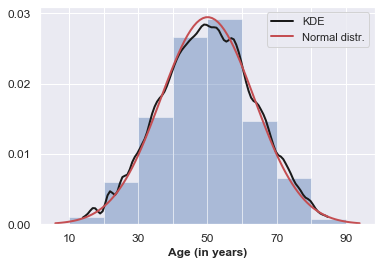

In [77]:
## fs = 12
# mean = np.mean(data['age'])
sns.distplot(data['age'], bins=list(range(10,100,10)),
             kde_kws={'color':'k','bw':.1,'linewidth':2,'label':'KDE'})
# plt.axvline(mean, color='black', linestyle='--', lw=2)
# plt.legend({'Mean':mean})

plt.rcParams.update({'font.size': 30})
plt.xlabel('Age (in years)', fontsize=fs, fontweight='bold')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal distr.')
plt.legend(fontsize=fs-1)
plt.yticks([.0,.01,.02,.03], fontsize=fs)
plt.xticks(list(range(10,100,10)),[10,'',30,'',50,'',70,'',90], fontsize=fs)

# plt.plot(x, p*(optimum/p), 'r')
# plt.plot(x, optimum/p, 'g')

# plt.show()
plt.savefig('figures/age_distribution.png', bbox_inches='tight')

In [56]:
mean_age = np.mean(data['age'])
tot_mae  = 0.
tot_mse  = 0.
count    = 0

for age in data['age']:
    diff = age-mean_age
    tot_mae += np.abs(diff)
    tot_mse += diff**2
    count   += 1
    
avg_mae = tot_mae/count
avg_mse = tot_mse/count

print('%.5f (MAE) %.5f (MSE) at %d samples with mean age: %.1f'%(avg_mae, avg_mse, count, mean_age))

10.96021 (MAE) 183.29718 (MSE) at 5877 samples with mean age: 50.0
